In [1]:
import h5py
import ROOT
import numpy as np
import pandas as pd

Welcome to JupyROOT 6.26/04


In [2]:
b_jet = pd.read_csv('b_jet.csv', usecols = ['DL1r_pb', 'DL1r_pc']) #only extract these two columns
c_jet = pd.read_csv('c_jet.csv', usecols = ['DL1r_pb', 'DL1r_pc'])

In [14]:
np_b_jet = b_jet.to_numpy()
bjet_c_over_b = np.log(np.divide(np_b_jet[:,1], np_b_jet[:,0])) #pc/pb discriminant score for all b-jet

np_c_jet = c_jet.to_numpy()
cjet_c_over_b = np.log(np.divide(np_c_jet[:,1], np_c_jet[:,0])) #pc/pb discriminant score for all c-jet

In [19]:
print(bjet_c_over_b.shape[0], cjet_c_over_b.shape[0])
print(np.max(cjet_c_over_b), np.min(cjet_c_over_b))

3578937 769322
5.803919115503613 -8.762951453483522


Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


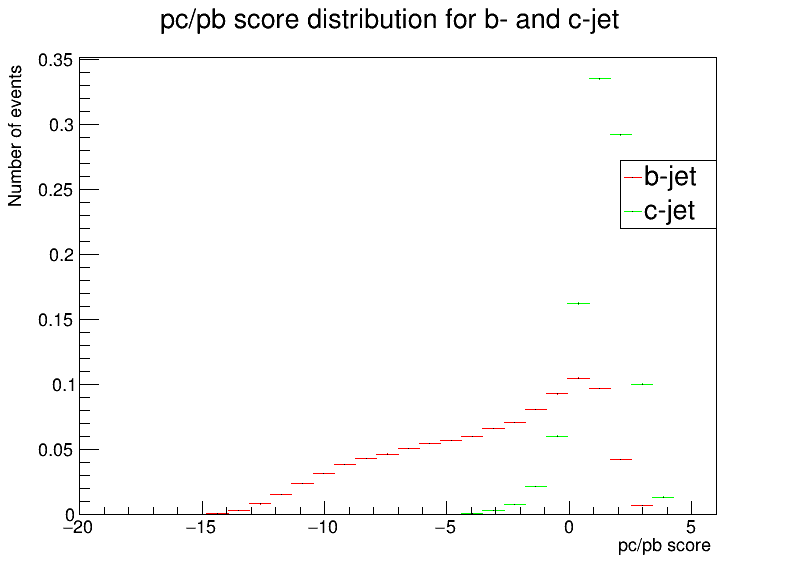

In [26]:
#Draw pc/pb discriminant score distribution 
b_c_over_b_plot = ROOT.TH1D("b-jet","pc/pb distribution",30,-20,6)
c_c_over_b_plot = ROOT.TH1D("c-jet","pc/pb distribution",30,-20,6)

b_c_over_b_plot.SetLineColor(2)
c_c_over_b_plot.SetLineColor(3)

b_len, c_len = bjet_c_over_b.shape[0], cjet_c_over_b.shape[0]

b_c_over_b_plot.FillN(b_len, bjet_c_over_b, 1/b_len*np.ones(b_len))
c_c_over_b_plot.FillN(c_len, cjet_c_over_b, 1/c_len*np.ones(c_len))

#b_c_over_b_plot.Scale(1/bjet_c_over_b.shape[0])
#c_c_over_b_plot.Scale(1/cjet_c_over_b.shape[0])

stack = ROOT.THStack("stack", "pc/pb score distribution for b- and c-jet")
stack.Add(b_c_over_b_plot)
stack.Add(c_c_over_b_plot)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
stack.Draw("nostack")
stack.GetYaxis().SetTitle("Number of events")
stack.GetXaxis().SetTitle("pc/pb score")
c.Draw()
legend = ROOT.TLegend(0.78, 0.6 ,0.90, 0.72)
legend.AddEntry(b_c_over_b_plot, "b-jet")
legend.AddEntry(c_c_over_b_plot, "c-jet")
legend.Draw()